# ML model

In [1]:
# Librerías generales
import pandas as pd   # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns # type: ignore
import warnings  

# Preprocesamiento de datos
from sklearn.preprocessing import StandardScaler, LabelEncoder  # type: ignore

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression  # type: ignore
from sklearn.ensemble import RandomForestClassifier  # type: ignore
from sklearn.neighbors import KNeighborsClassifier  # type: ignore
from xgboost import XGBClassifier  # type: ignore

# Métricas y evaluación de modelos
from sklearn.metrics import ( # type: ignore
    accuracy_score, classification_report, confusion_matrix, 
    precision_score, recall_score, f1_score 
)

# División de datos y optimización de hiperparámetros
from sklearn.model_selection import train_test_split, GridSearchCV  # type: ignore


In [2]:
train = pd.read_csv('train_processed.csv')

In [3]:
train = train.drop(columns = 'FareGroup')

Accuracy: 0.8202
Matriz de Confusión:
[[49  9]
 [ 7 24]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        58
           1       0.73      0.77      0.75        31

    accuracy                           0.82        89
   macro avg       0.80      0.81      0.80        89
weighted avg       0.82      0.82      0.82        89



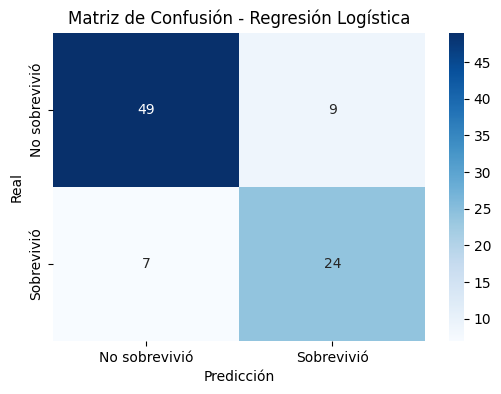

In [4]:
# Separar variables predictoras (X) y variable objetivo (y)
X = train.drop(columns=['Survived'], errors='ignore')
y = train['Survived']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Escalado de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No sobrevivió", "Sobrevivió"], yticklabels=["No sobrevivió", "Sobrevivió"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


Accuracy: 0.8202
Matriz de Confusión:
[[50  8]
 [ 8 23]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        58
           1       0.74      0.74      0.74        31

    accuracy                           0.82        89
   macro avg       0.80      0.80      0.80        89
weighted avg       0.82      0.82      0.82        89



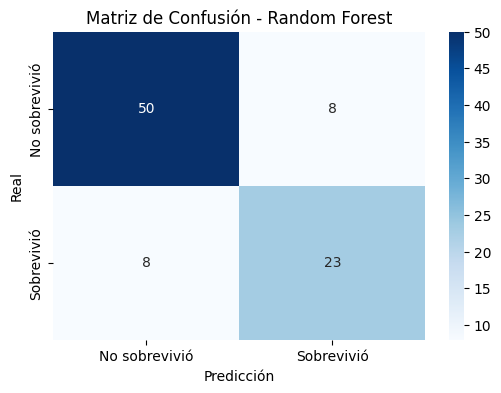

C:\Users\paula\AppData\Local\Temp\ipykernel_18352\3667803162.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")


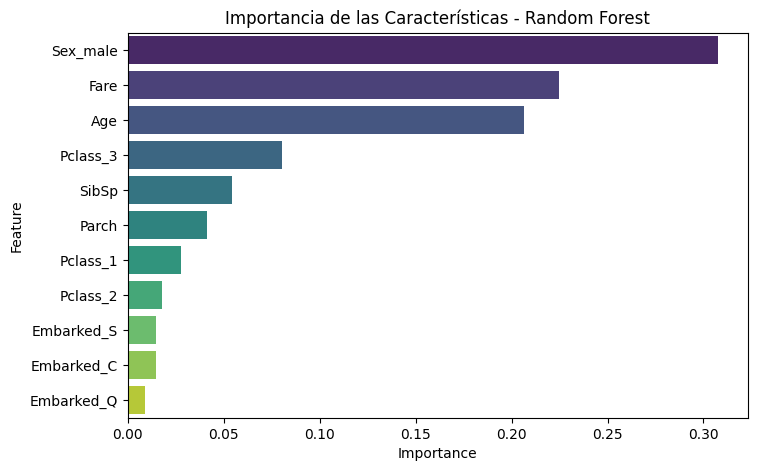

In [5]:
# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No sobrevivió", "Sobrevivió"], yticklabels=["No sobrevivió", "Sobrevivió"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Importancia de las características
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Gráfico de importancia de características
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Importancia de las Características - Random Forest")
plt.show()

In [6]:
# Separar variables predictoras y objetivo
X = train.drop(columns=['Survived'])
y = train['Survived']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Escalar los datos (IMPORTANTE para k-NN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar k-NN con 4 vecinos
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7978
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        58
           1       0.74      0.65      0.69        31

    accuracy                           0.80        89
   macro avg       0.78      0.76      0.77        89
weighted avg       0.79      0.80      0.79        89



In [7]:
# Separar variables predictoras y objetivo
X = train.drop(columns=['Survived'])
y = train['Survived']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Escalar los datos (IMPORTANTE para Regresión Logística)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir la Regresión Logística con GridSearchCV
param_grid = {
    'C': [0.001, 0.08, 0.1, 0.2, 1, 10, 100],  # Regularización
    'solver': ['liblinear', 'lbfgs', 'newton-cg']  # Diferentes optimizadores
}

grid_search = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_
print(f"Mejores parámetros: {grid_search.best_params_}")

# Predicciones con el modelo optimizado
y_pred = best_model.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


Mejores parámetros: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy: 0.7978
Matriz de Confusión:
[[47  8]
 [10 24]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        55
           1       0.75      0.71      0.73        34

    accuracy                           0.80        89
   macro avg       0.79      0.78      0.78        89
weighted avg       0.80      0.80      0.80        89



In [8]:
# Entrenar el modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.8090
Matriz de Confusión:
[[44 11]
 [ 6 28]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        55
           1       0.72      0.82      0.77        34

    accuracy                           0.81        89
   macro avg       0.80      0.81      0.80        89
weighted avg       0.82      0.81      0.81        89



c:\Users\paula\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:57:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [9]:
# Definir el rango de vecinos a probar
param_grid = {'n_neighbors': range(1, 101)}

# Configurar GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Mejor número de vecinos encontrado
best_k = grid_search_knn.best_params_['n_neighbors']
print(f"Mejor número de vecinos: {best_k}")

# Entrenar KNN con el mejor k encontrado
knn_optimized = KNeighborsClassifier(n_neighbors=best_k)
knn_optimized.fit(X_train, y_train)

# Predicciones
y_pred_knn_opt = knn_optimized.predict(X_test)

# Evaluación del modelo optimizado
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_opt):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_knn_opt))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_knn_opt))


Mejor número de vecinos: 35
Accuracy: 0.7978
Matriz de Confusión:
[[48  7]
 [11 23]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        55
           1       0.77      0.68      0.72        34

    accuracy                           0.80        89
   macro avg       0.79      0.77      0.78        89
weighted avg       0.80      0.80      0.79        89



In [10]:
# Definir hiperparámetros a probar
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
best_rf_params = grid_search_rf.best_params_
print(f"Mejores parámetros de Random Forest: {best_rf_params}")

# Entrenar Random Forest optimizado
rf_optimized = RandomForestClassifier(**best_rf_params, random_state=42)
rf_optimized.fit(X_train, y_train)

# Predicciones
y_pred_rf_opt = rf_optimized.predict(X_test)

# Evaluar modelo optimizado
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_opt):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf_opt))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf_opt))


Mejores parámetros de Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.7978
Matriz de Confusión:
[[49  6]
 [12 22]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        55
           1       0.79      0.65      0.71        34

    accuracy                           0.80        89
   macro avg       0.79      0.77      0.78        89
weighted avg       0.80      0.80      0.79        89



In [11]:
# Entrenar XGBoost sin GridSearch para probar si el modelo base funciona
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.8090
Matriz de Confusión:
[[44 11]
 [ 6 28]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        55
           1       0.72      0.82      0.77        34

    accuracy                           0.81        89
   macro avg       0.80      0.81      0.80        89
weighted avg       0.82      0.81      0.81        89



c:\Users\paula\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:58:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [12]:
# Definir diferentes configuraciones de hiperparámetros
param_sets = [
    {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0},
    {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1},
    {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.2},
    {'n_estimators': 500, 'max_depth': 50, 'learning_rate': 0.5, 'gamma': 0.5},
]

best_model = None
best_accuracy = 0

# Probar cada combinación manualmente
for params in param_sets:
    print(f"Probando parámetros: {params}")
    model = XGBClassifier(**params, eval_metric='logloss', use_label_encoder=False, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

print("\n🔹 Mejor configuración encontrada:")
print(best_model.get_params())

# Evaluar el mejor modelo
y_pred_best = best_model.predict(X_test)
print(f"\n🔹 Mejor accuracy: {best_accuracy:.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_best))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_best))

Probando parámetros: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0}


c:\Users\paula\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:58:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\paula\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:58:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7528
Probando parámetros: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1}
Accuracy: 0.8315
Probando parámetros: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.2}


c:\Users\paula\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:58:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\paula\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:58:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8090
Probando parámetros: {'n_estimators': 500, 'max_depth': 50, 'learning_rate': 0.5, 'gamma': 0.5}
Accuracy: 0.8202

🔹 Mejor configuración encontrada:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': 0.1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_m


🔹 Modelo: Regresión Logística
Accuracy: 0.8315
Matriz de Confusión:
[[49  6]
 [ 9 25]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        55
           1       0.81      0.74      0.77        34

    accuracy                           0.83        89
   macro avg       0.83      0.81      0.82        89
weighted avg       0.83      0.83      0.83        89


🔹 Modelo: k-NN sin optimizar
Accuracy: 0.8090
Matriz de Confusión:
[[51  4]
 [13 21]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        55
           1       0.84      0.62      0.71        34

    accuracy                           0.81        89
   macro avg       0.82      0.77      0.78        89
weighted avg       0.81      0.81      0.80        89


🔹 Modelo: k-NN optimizado
Accuracy: 0.7978
Matriz de Confusión:
[[48  7]
 [11 23]]
Reporte de Clasificación:
         

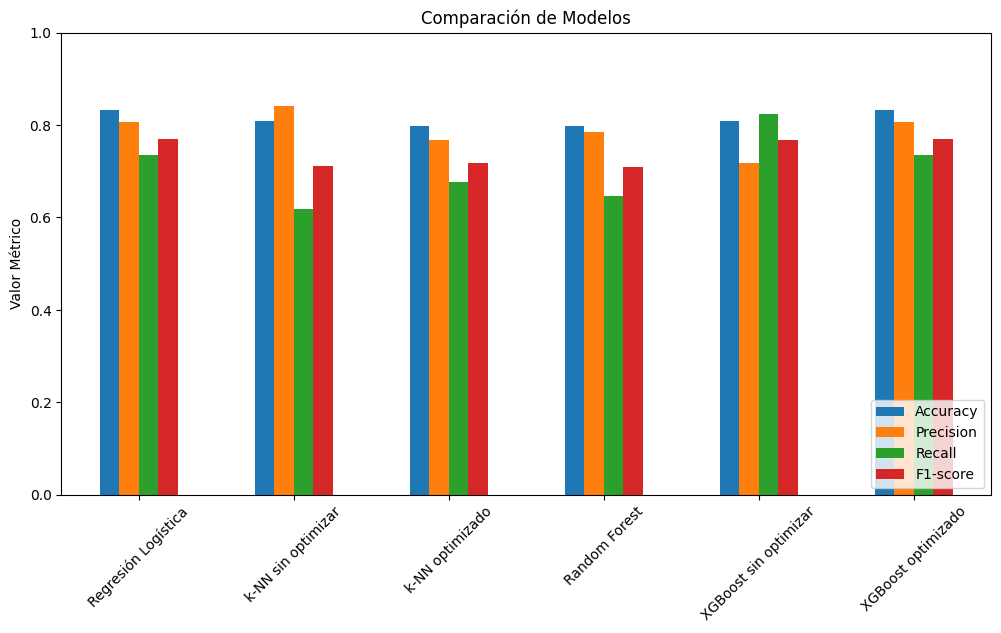

In [13]:
# Diccionario para almacenar los resultados de cada modelo
model_results = {}

# Función para evaluar un modelo y guardar sus métricas
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Guardar resultados
    model_results[name] = [acc, precision, recall, f1]

    # Mostrar matriz de confusión y reporte de clasificación
    print(f"\n🔹 Modelo: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))

# 📌 Usar los nombres correctos de los modelos
evaluate_model("Regresión Logística", best_model, X_test, y_test)  # Modelo optimizado con GridSearch
evaluate_model("k-NN sin optimizar", knn, X_test, y_test)
evaluate_model("k-NN optimizado", knn_optimized, X_test, y_test)
evaluate_model("Random Forest", rf_optimized, X_test, y_test)
evaluate_model("XGBoost sin optimizar", xgb_model, X_test, y_test)
evaluate_model("XGBoost optimizado", best_model, X_test, y_test)  # Modelo optimizado manualmente

# Convertir los resultados a un DataFrame para mejor visualización
df_results = pd.DataFrame(model_results, index=['Accuracy', 'Precision', 'Recall', 'F1-score']).T

# Mostrar tabla de resultados en consola
print("\n🔹 Comparación de Modelos:")
print(df_results)

# Graficar los resultados
df_results.plot(kind='bar', figsize=(12, 6), ylim=(0, 1), title="Comparación de Modelos", ylabel="Valor Métrico")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()
